In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Loading Dataset

In [4]:
df_train = pd.read_csv('ttrain.csv')
df_test = pd.read_csv('ttest.csv')

## PreProcessing Data

In [7]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,2087-QAREY,Female,0,Yes,No,22.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.70,1178.75
1,0601-WZHJF,Male,0,Yes,No,14.0,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.35,667.7
2,4423-JWZJN,Male,0,Yes,Yes,64.0,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),90.25,5629.15
3,5143-WMWOG,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.95,19.95
4,6490-FGZAT,Male,0,No,No,6.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,109.3


In [11]:
df_train.shape

(5635, 21)

In [13]:
df_test.shape

(1408, 20)

In [15]:
df_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df_test.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [19]:
df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5628.000000,5622.000000,5619.000000
mean,0.160270,32.286375,64.854983
std,0.366889,24.591460,30.105189
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.550000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5635 non-null   object 
 1   gender            5635 non-null   object 
 2   SeniorCitizen     5628 non-null   float64
 3   Partner           5635 non-null   object 
 4   Dependents        5635 non-null   object 
 5   tenure            5622 non-null   float64
 6   PhoneService      5622 non-null   object 
 7   MultipleLines     5622 non-null   object 
 8   InternetService   5598 non-null   object 
 9   OnlineSecurity    5620 non-null   object 
 10  OnlineBackup      5620 non-null   object 
 11  DeviceProtection  5620 non-null   object 
 12  TechSupport       5620 non-null   object 
 13  StreamingTV       5613 non-null   object 
 14  StreamingMovies   5621 non-null   object 
 15  Contract          5610 non-null   object 
 16  PaperlessBilling  5621 non-null   object 


## Duplicates Check

In [24]:
df_train.duplicated().sum()

0

In [26]:
df_test.duplicated().sum()

0

## Missing Values Check

In [29]:
df_train.isna().sum()

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [31]:
df_test.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               8
PhoneService        11
MultipleLines       12
InternetService      8
OnlineSecurity       8
OnlineBackup         8
DeviceProtection    10
TechSupport         10
StreamingTV          8
StreamingMovies     15
Contract            15
PaperlessBilling    15
PaymentMethod        8
MonthlyCharges       8
TotalCharges         0
dtype: int64

## Handling Missing Values

In [34]:
# Splitting into numerical and categorical columns

num_df = df_train.select_dtypes(include=['number'])
cat_df = df_train.select_dtypes(include = ['object'])

num_df_test = df_test.select_dtypes(include=['number'])
cat_df_test = df_test.select_dtypes(include = ['object'])

In [36]:
num_columns = num_df.columns.tolist()
cat_columns = cat_df.columns.tolist()
print("Numerical columns:",num_columns)
print("Categorical columns:",cat_columns)

num_columns_test = num_df_test.columns.tolist()
cat_columns_test = cat_df_test.columns.tolist()
print("Numerical columns of test data:",num_columns_test)
print("Categorical columns of test data:",cat_columns_test)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical columns of test data: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns of test data: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


## Correlation Check

<Axes: >

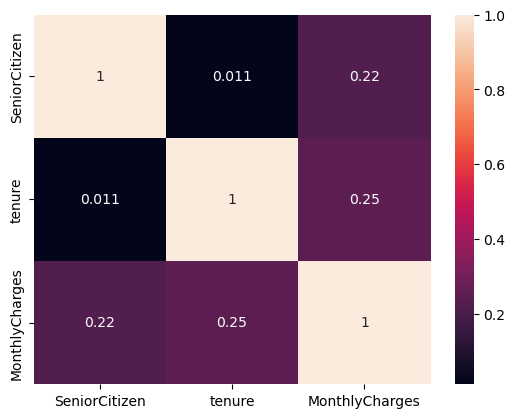

In [39]:
sns.heatmap(num_df.corr(),annot= True)

## EDA

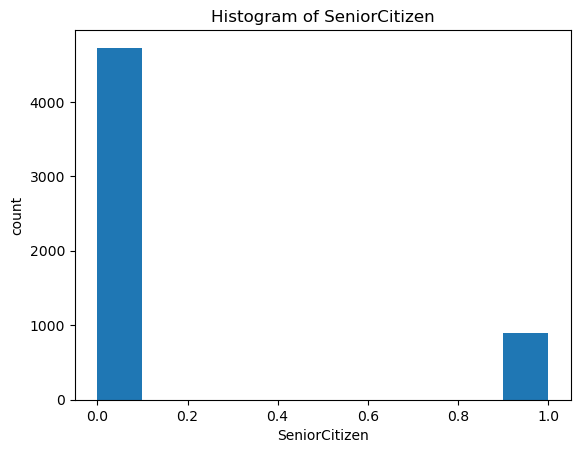

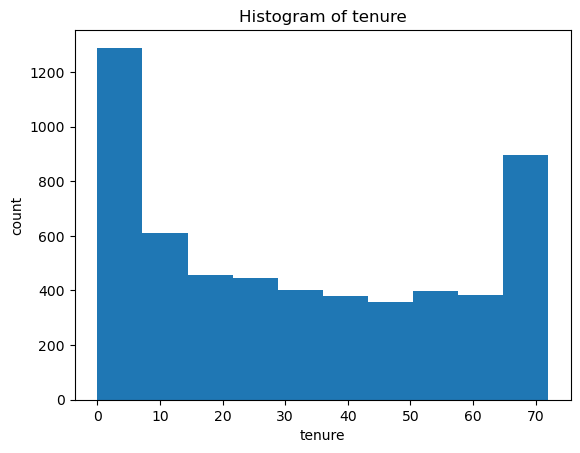

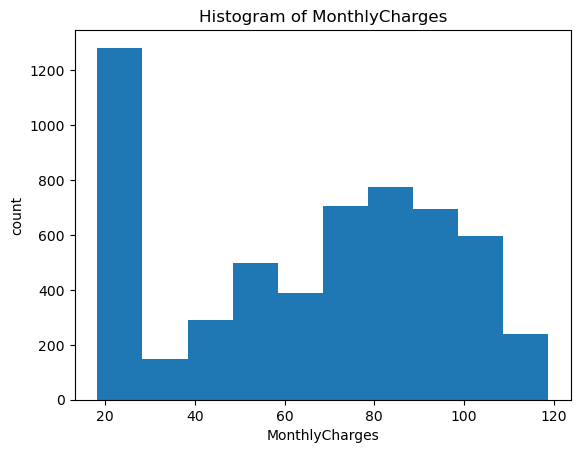

In [42]:
for col in num_columns:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(col))
    plt.show()

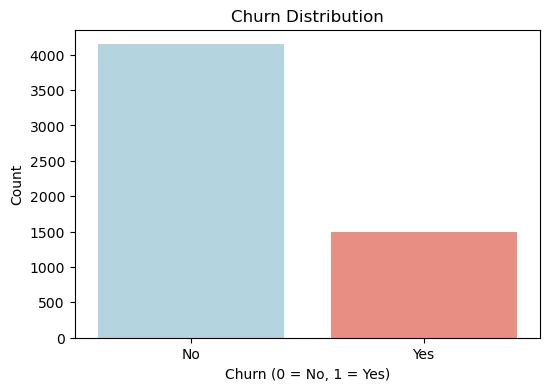

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='Churn', hue='Churn', palette=['lightblue', 'salmon'], legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


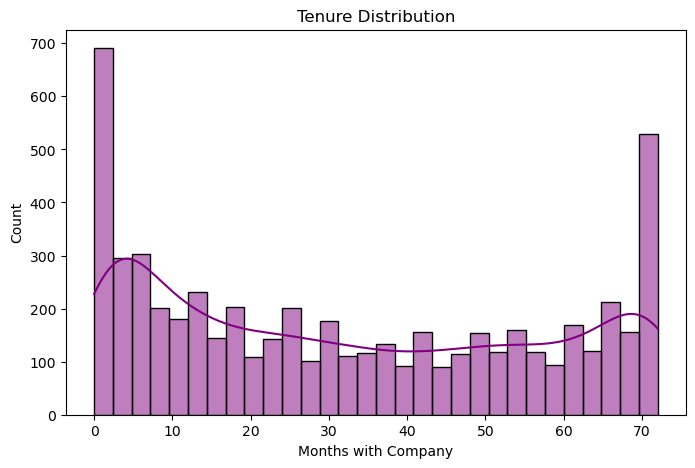

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df_train['tenure'], bins=30, kde=True, color='purple')
plt.title("Tenure Distribution")
plt.xlabel("Months with Company")
plt.ylabel("Count")
plt.show()



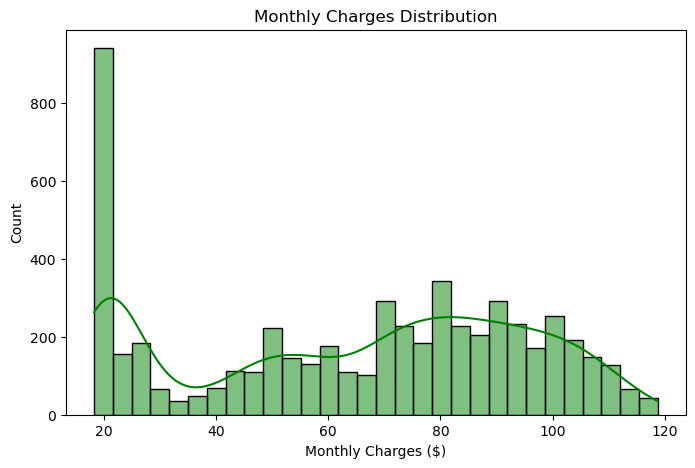

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df_train['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()


C:\Users\madha\AppData\Local\Temp\ipykernel_10220\1687363950.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Churn_Yes")  # Adds a legend


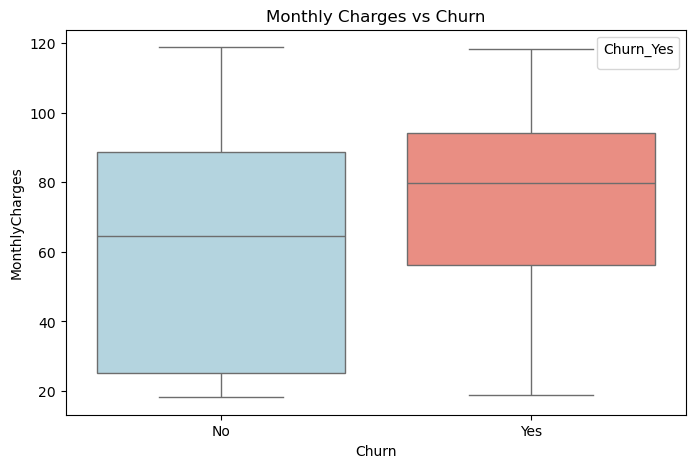

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_train, hue='Churn', palette=['lightblue', 'salmon'])
plt.title("Monthly Charges vs Churn")
plt.legend(title="Churn_Yes")  # Adds a legend
plt.show()



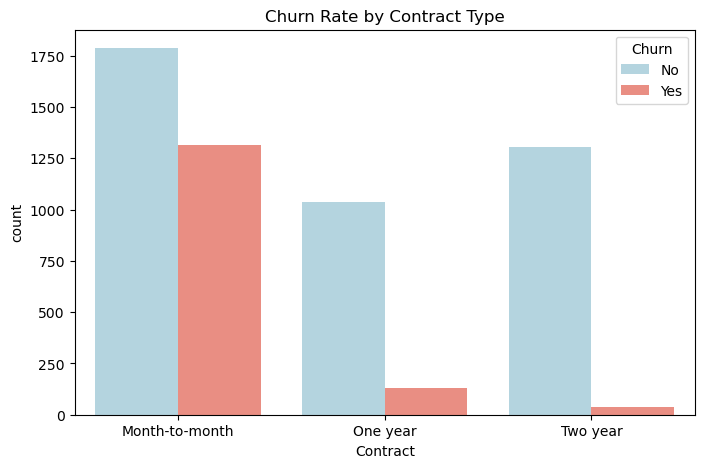

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df_train, palette=['lightblue', 'salmon'])
plt.title("Churn Rate by Contract Type")
plt.show()


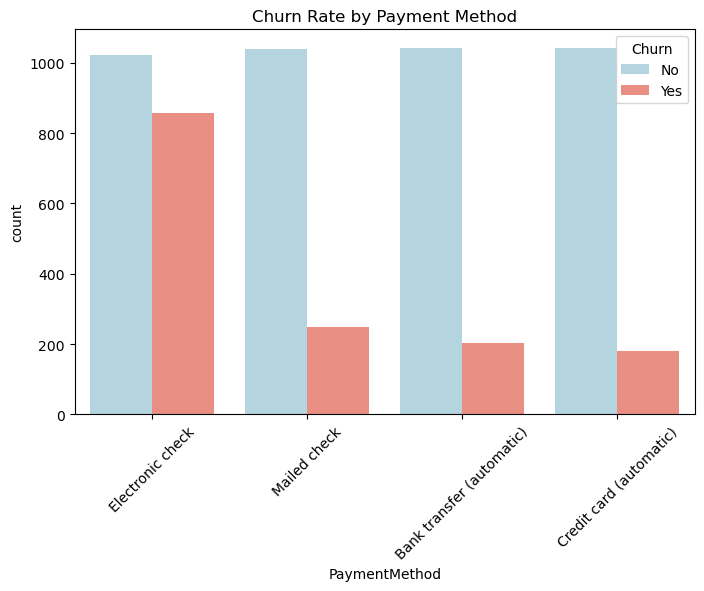

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_train, palette=['lightblue', 'salmon'])
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.show()


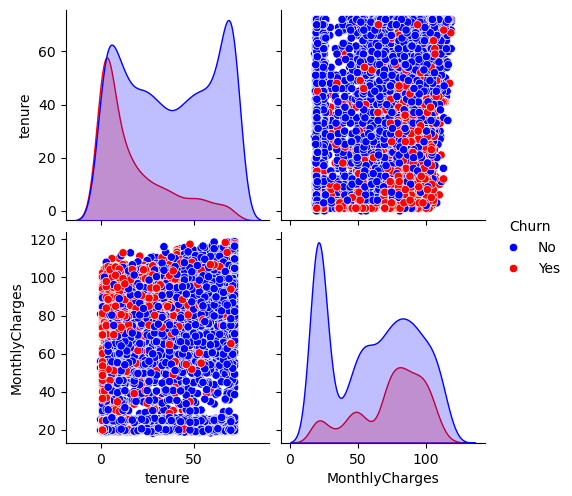

In [62]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(df_train[selected_features], hue='Churn', palette=['blue', 'red'])
plt.show()


In [64]:
# Filling missing values in numerical columns of train data
for col in num_columns:
  num_df[col] = num_df[col].fillna(num_df[col].median())

# Filling missing values in numerical columns of test data
for col in num_columns_test:
  num_df_test[col] = num_df_test[col].fillna(num_df_test[col].median())  

In [66]:
num_df.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

In [68]:
num_df_test.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

In [70]:
# Handling Missing Values in categorical columns in train data
for col in cat_columns:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

# Handling Missing Values in categorical columns in test data
for col in cat_columns_test:
    cat_df_test[col] = cat_df_test[col].fillna(cat_df_test[col].mode()[0])

In [72]:
cat_df.isna().sum()

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

In [74]:
cat_df_test.isna().sum()

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
dtype: int64

In [76]:
df_train = pd.concat([cat_df,num_df],axis=1)
df_test = pd.concat([cat_df_test,num_df_test],axis=1)


In [78]:
df_train.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,SeniorCitizen,tenure,MonthlyCharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,No,0.0,1.0,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,1889.5,No,0.0,34.0,56.95
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,0.0,2.0,53.85
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),1840.75,No,0.0,45.0,42.30
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,0.0,2.0,70.70


In [80]:
df_test.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MonthlyCharges
0,2087-QAREY,Female,Yes,No,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,1178.75,0,22.0,54.70
1,0601-WZHJF,Male,Yes,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,667.7,0,14.0,46.35
2,4423-JWZJN,Male,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),5629.15,0,64.0,90.25
3,5143-WMWOG,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.95,0,1.0,19.95
4,6490-FGZAT,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,109.3,0,6.0,20.65


## Outlier Handling

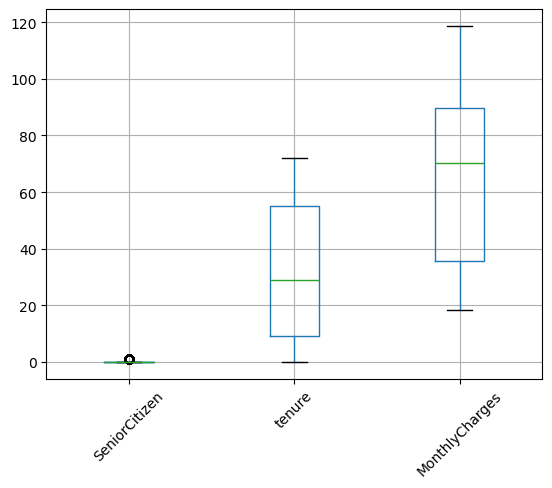

In [83]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

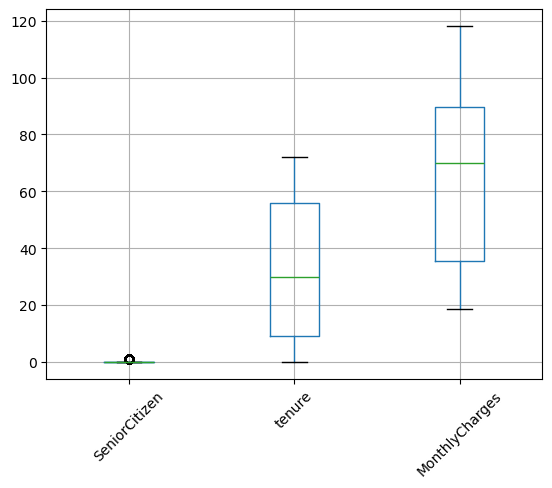

In [85]:
num_df_test.boxplot()
plt.xticks(rotation=45)
plt.show()

In [87]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [89]:
for col in num_columns:
  num_df[col] = remove_outliers(num_df, col)

In [91]:
for col in num_columns_test:
  num_df_test[col] = remove_outliers(num_df_test, col)

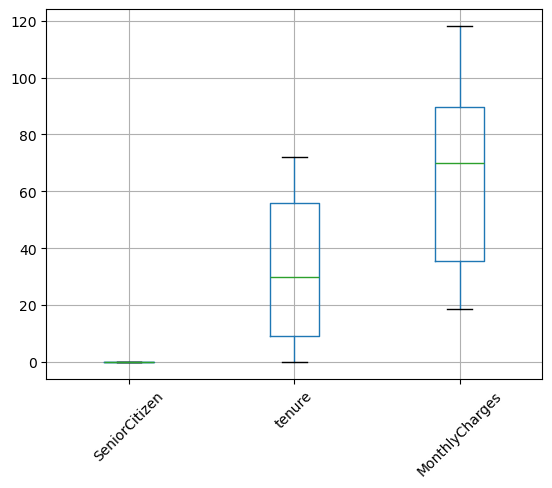

In [93]:
num_df_test.boxplot()
plt.xticks(rotation=45)
plt.show()

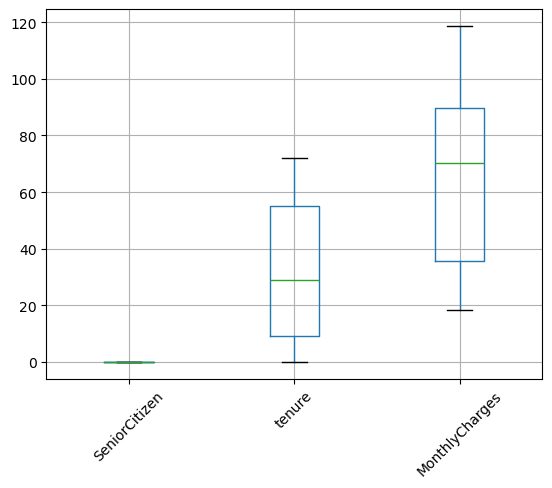

In [334]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

## Data Imbalance Check

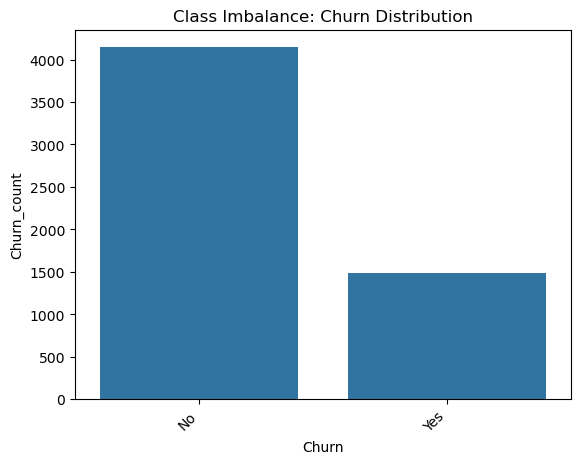

In [95]:
# Plot class imbalance
sns.countplot(x='Churn', data=df_train)
plt.title('Class Imbalance: Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Churn_count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Feature Encoding

In [98]:
# One hot encoding for columns in training dataset
df_train = pd.get_dummies(df_train,columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],dtype= int,drop_first=True)
df_train

,customerID,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,7590-VHVEG,0.0,1.0,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0.0,34.0,56.95,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0.0,2.0,53.85,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,0.0,45.0,42.30,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0.0,2.0,70.70,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,9801-GDWGV,0.0,39.0,103.45,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5631,6542-LWGXJ,0.0,3.0,25.00,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5632,5567-GZKQY,0.0,58.0,20.30,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5633,1222-LRYKO,0.0,6.0,26.35,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_test = pd.get_dummies(df_test,columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],dtype= int,drop_first=True)
df_test

,customerID,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_97.5,TotalCharges_978,TotalCharges_979.5,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_993.15,TotalCharges_995.35,TotalCharges_997.65,TotalCharges_997.75
0,2087-QAREY,0,22.0,54.70,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0601-WZHJF,0,14.0,46.35,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4423-JWZJN,0,64.0,90.25,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5143-WMWOG,0,1.0,19.95,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6490-FGZAT,0,6.0,20.65,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,6840-RESVB,0,24.0,84.80,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1404,2234-XADUH,0,72.0,103.20,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1405,4801-JZAZL,0,11.0,29.60,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1406,8361-LTMKD,1,4.0,74.40,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [102]:
ID =  pd.DataFrame(df_test['customerID'])
ID

,customerID
0,2087-QAREY
1,0601-WZHJF
2,4423-JWZJN
3,5143-WMWOG
4,6490-FGZAT
...,...
1403,6840-RESVB
1404,2234-XADUH
1405,4801-JZAZL
1406,8361-LTMKD


In [104]:
df_train = df_train.drop('customerID',axis = 1)

df_test = df_test.drop('customerID',axis = 1)

## Feature Scaling

In [107]:
# min max scaling for faetures having non-gaussian distribution in training dataset
min_scaler = MinMaxScaler()
numerical_colms1 = ['tenure', 'MonthlyCharges']
df_train[numerical_colms1] = min_scaler.fit_transform(df_train[numerical_colms1])
df_train

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0.0,0.013889,0.115423,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.472222,0.385075,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.027778,0.354229,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.625000,0.239303,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.027778,0.521891,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,0.0,0.541667,0.847761,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5631,0.0,0.041667,0.067164,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5632,0.0,0.805556,0.020398,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5633,0.0,0.083333,0.080597,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:

# min max scaling for features having non gaussian distribution in testing dataset
min_scaler = MinMaxScaler()
numerical_colms2 = ['tenure', 'MonthlyCharges']
df_test[numerical_colms2] = min_scaler.fit_transform(df_test[numerical_colms2])
df_test

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_97.5,TotalCharges_978,TotalCharges_979.5,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_993.15,TotalCharges_995.35,TotalCharges_997.65,TotalCharges_997.75
0,0,0.305556,0.362770,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.194444,0.278976,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.888889,0.719518,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.013889,0.014049,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.083333,0.021074,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,0,0.333333,0.664827,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1404,0,1.000000,0.849473,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1405,0,0.152778,0.110888,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1406,1,0.055556,0.560462,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Model Training

In [112]:
# Seperating Features and labels
X = df_train.drop(['Churn_Yes'],axis =1)
y = df_train['Churn_Yes']
X_test1 = df_test

# Train test split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 46)

## Naive Bayes

In [118]:
# Training and prediction on training data
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train,y_train)
y_pred = naive_bayes_model.predict(X_test)

In [120]:
# On training data
print ("accuracy_score:" , accuracy_score(y_pred,y_test))

accuracy_score: 0.26175687666370895


In [122]:
#  prediction on testing data
y_pred1 = naive_bayes_model.predict(X_test)

## Decision Tree

In [125]:
# Training and prediction on training data
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [127]:
# On training data
print ("accuracy_score:" , accuracy_score(y_pred,y_test))

accuracy_score: 0.7817213842058562


In [129]:
#  prediction on testing data
y_pred1 = decision_tree_model.predict(X_test)

## Random Forest

In [132]:
# Training and prediction on training data
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train,y_train)
y_pred = Random_forest_model.predict(X_test)

In [134]:
# On training data
print ("accuracy_score:" , accuracy_score(y_pred,y_test))

accuracy_score: 0.8251996450754214


In [136]:
#  prediction on testing data
y_pred1 = Random_forest_model.predict(X_test)

## Logistic Regression

In [139]:
# Training and prediction on training data
Logisticreg_model = LogisticRegression()
Logisticreg_model.fit(X_train,y_train)
y_pred = Logisticreg_model.predict(X_test)

In [141]:
# On training data
print ("accuracy_score:" , accuracy_score(y_pred,y_test))

accuracy_score: 0.8234250221827861


In [143]:
#  prediction on testing data
y_pred1 = Logisticreg_model.predict(X_test)

## SVC

In [146]:
# Training and prediction on training data
SVC_model = SVC()
SVC_model.fit(X_train,y_train)
y_pred = SVC_model.predict(X_test)

In [148]:
# On training data
print ("accuracy_score:" , accuracy_score(y_pred,y_test))

accuracy_score: 0.8243123336291038


In [ ]:
#  prediction on testing data
y_pred1 = SVC_model.predict(X_test)

## HyperParameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Use bootstrap samples or not
}

# Perform RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                               n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit model
rf_random.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", rf_random.best_params_)

# Train the final model with best parameters
best_rf = rf_random.best_estimator_

# Evaluate on test data
y_pred = best_rf.predict(X_test)

# Performance metrics
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
